## Ensemble Techniques Project - VGK

### Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Domain:
Banking

### Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

### Attribute Information:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical:'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb','mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric).
    - Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary:"yes","no")

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using an Ensemble Model
- Comparing model perfomances

### Objective:
The classification goal is to predict if the client will subscribe (yes/no) aterm deposit (variable y).

#### Ref ::
https://activewizards.com/blog/top-9-data-science-use-cases-in-banking/
https://thefinancialbrand.com/71350/ai-machine-learning-analytics-marketing-banking-trends/

### 1. Import the necessary libraries

In [1]:
# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

### 2. Read the data as a data frame

In [2]:
# reading the CSV file into pandas dataframe
bank_df = pd.read_csv("bank-full.csv")

In [3]:
# Check top few records to get a feel of the data structure
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### 3. Perform basic EDA which should include the following and print out your insights at every step.

#### a. Shape of the data

In [4]:
bank_df.shape

(45211, 17)

#### b. Data type of each attribute

In [5]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
#convert to numbers
bank_df['Target'] = bank_df['Target'].map({'yes': 1, 'no': 0})

In [7]:
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0})

In [8]:
bank_df['housing'] = bank_df['housing'].map({'yes': 1, 'no': 0})

In [9]:
bank_df['loan'] = bank_df['loan'].map({'yes': 1, 'no': 0})

In [10]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

In [11]:
first_type_dict = {'age':'int64','job':'object','marital':'object','education':'object','default':'bool','balance':'int64','housing':'bool','loan':'bool','contact':'object','day':'int64','month':'object','duration':'int64','campaign':'int64','pdays':'int64','previous':'int64','poutcome':'object','Target':'bool'}
bank_df = bank_df.astype(first_type_dict)

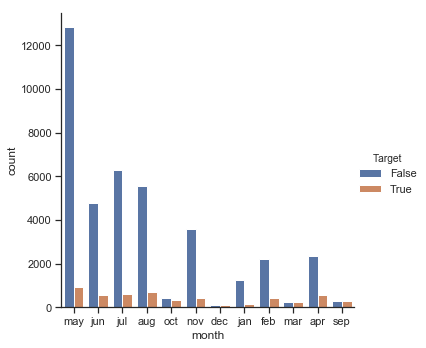

In [12]:
#plot month freq
sns.set(style="ticks", color_codes=True)
sns.catplot(x='month',hue='Target', kind="count", data=bank_df)

### Looks like there is some impact of month on target (0/1) distribution.. Sep, Mar, oct seems good months

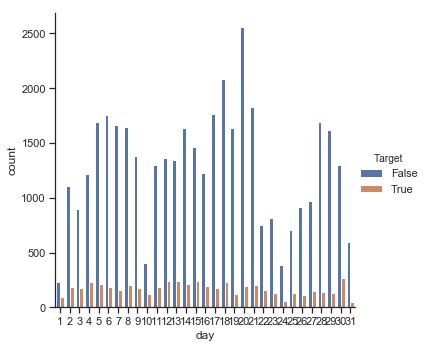

In [13]:
#plot target against day
#plot month freq
sns.set(style="ticks", color_codes=True)
sns.catplot(x='day',hue='Target', kind="count", data=bank_df)

In [14]:
# job, marital, education, contact, poutcome, month, day are categorical, lets one hot them

bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,False,2143,True,False,unknown,5,may,261,1,-1,0,unknown,False
1,44,technician,single,secondary,False,29,True,False,unknown,5,may,151,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,5,may,76,1,-1,0,unknown,False
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,5,may,92,1,-1,0,unknown,False
4,33,unknown,single,unknown,False,1,False,False,unknown,5,may,198,1,-1,0,unknown,False
5,35,management,married,tertiary,False,231,True,False,unknown,5,may,139,1,-1,0,unknown,False
6,28,management,single,tertiary,False,447,True,True,unknown,5,may,217,1,-1,0,unknown,False
7,42,entrepreneur,divorced,tertiary,True,2,True,False,unknown,5,may,380,1,-1,0,unknown,False
8,58,retired,married,primary,False,121,True,False,unknown,5,may,50,1,-1,0,unknown,False
9,43,technician,single,secondary,False,593,True,False,unknown,5,may,55,1,-1,0,unknown,False


#### c. Checking the presence of missing values

In [15]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null bool
balance      45211 non-null int64
housing      45211 non-null bool
loan         45211 non-null bool
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null bool
dtypes: bool(4), int64(7), object(6)
memory usage: 4.7+ MB


#### d. 5 point summary of numerical attributes

In [16]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [17]:
#just want to sns pair plot before all treatment
#sns.pairplot(bank_df, hue="Target")

#### e. Checking the presence of outliers

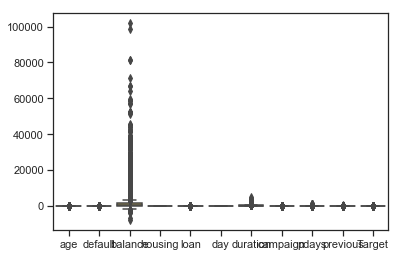

In [18]:
sns.boxplot(data=bank_df)

In [19]:
#just check outcomes for skew - looks like there is some skew
bank_df.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
False,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
True,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


### Ratio  of 0 : 1 == 0.8830151954170445: 0.1169848045829555 (0.883 : 0.117)

In [20]:
bank_df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


In [21]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default        bool
balance       int64
housing        bool
loan           bool
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target         bool
dtype: object

### 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [22]:
bank_df_conv = bank_df.copy()

In [23]:
bank_df_conv.dtypes

age           int64
job          object
marital      object
education    object
default        bool
balance       int64
housing        bool
loan           bool
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target         bool
dtype: object

In [ ]:
bank_df_conv.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,False,2143,True,False,unknown,5,may,261,1,-1,0,unknown,False
1,44,technician,single,secondary,False,29,True,False,unknown,5,may,151,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,5,may,76,1,-1,0,unknown,False
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,5,may,92,1,-1,0,unknown,False
4,33,unknown,single,unknown,False,1,False,False,unknown,5,may,198,1,-1,0,unknown,False
5,35,management,married,tertiary,False,231,True,False,unknown,5,may,139,1,-1,0,unknown,False
6,28,management,single,tertiary,False,447,True,True,unknown,5,may,217,1,-1,0,unknown,False
7,42,entrepreneur,divorced,tertiary,True,2,True,False,unknown,5,may,380,1,-1,0,unknown,False
8,58,retired,married,primary,False,121,True,False,unknown,5,may,50,1,-1,0,unknown,False
9,43,technician,single,secondary,False,593,True,False,unknown,5,may,55,1,-1,0,unknown,False


In [ ]:
#one hot encode job, marital, education, poutcome, education, contact --
#bank_df_onehot = pd.get_dummies(bank_df_conv, columns=['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome'], drop_first=False)

#drop Day & Month
bank_df_conv_drop = bank_df_conv.drop(['day'], axis = 1) 
bank_df_conv_drop = bank_df_conv_drop.drop(['job'], axis = 1) 
bank_df_conv_drop = bank_df_conv_drop.drop(['marital'], axis = 1) 
bank_df_conv_drop = bank_df_conv_drop.drop(['contact'], axis = 1) 

#bank_df_conv_drop = bank_df_conv_drop.drop(['month'], axis = 1) 
bank_df_onehot = pd.get_dummies(bank_df_conv_drop, columns=['education', 'poutcome', 'month'], drop_first=False)

#for col in ['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome']:
#    bank_df[col] = bank_df[col].astype('category')
bank_df_onehot.head(10)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,False,2143,True,False,261,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
1,44,False,29,True,False,151,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
2,33,False,2,True,True,76,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
3,47,False,1506,True,False,92,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
4,33,False,1,False,False,198,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
5,35,False,231,True,False,139,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
6,28,False,447,True,True,217,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
7,42,True,2,True,False,380,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
8,58,False,121,True,False,50,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0
9,43,False,593,True,False,55,1,-1,0,False,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
bank_df_onehot.dtypes

age                    int64
default                 bool
balance                int64
housing                 bool
loan                    bool
duration               int64
campaign               int64
pdays                  int64
previous               int64
Target                  bool
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
month_apr              uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun              uint8
month_mar              uint8
month_may              uint8
month_nov              uint8
month_oct              uint8
month_sep              uint8
dtype: object

In [ ]:
#pair plot to check data spread -- takes too long
#sns.pairplot(bank_df_onehot, hue="Target")
#sns.pairplot(bank_df_conv, hue="Target")

### 5. Train a few standard classification algorithms, note and comment on their performances along different metrics.


## LR

In [ ]:
## Define X and y variables
X = bank_df_onehot.drop('Target', axis=1)
y = bank_df_onehot[['Target']]
y=y.astype('int')

##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[23577  4332]
 [  763  2975]]


In [ ]:
logreg.score(X_train,y_train)

0.8390052769614813

In [ ]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[10108  1905]
 [  312  1239]]


In [ ]:
logreg.score(X_test,y_test)

0.8365526393394279

In [ ]:
print("Logistic Regression Metrics = \n", metrics.classification_report(y_test, pred_test))

Logistic Regression Metrics = 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     12013
           1       0.39      0.80      0.53      1551

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.84      0.86     13564



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train.values.ravel())
pred_train = NNH.predict(X_train)
mat_train = confusion_matrix(y_train,pred_train)

In [ ]:
NNH.score(X_train, y_train)

1.0

In [ ]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

pred_test = NNH.predict(X_test)

In [ ]:
NNH.score(X_test, y_test)

0.8810085520495429

In [ ]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    0  3738]]


In [ ]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[11506   507]
 [ 1107   444]]


In [ ]:
print("KNN Metrics = \n", metrics.classification_report(y_test, pred_test))

KNN Metrics = 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.47      0.29      0.35      1551

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.69      0.62      0.64     13564
weighted avg       0.86      0.88      0.87     13564



## Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train.values.ravel())
pred_train = clf.predict(X_train)

In [ ]:
clf.score(X_train, y_train)

0.8658324643726104

In [ ]:
pred_test = clf.predict(X_test)
clf.score(X_test, y_test)

0.8650103214391035

In [ ]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[25631  2278]
 [ 1968  1770]]


In [ ]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[10993  1020]
 [  811   740]]


In [ ]:
print("NAIVE BAYES Metrics = \n", metrics.classification_report(y_test, pred_test))

NAIVE BAYES Metrics = 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     12013
           1       0.42      0.48      0.45      1551

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.68      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train,y_train.values.ravel())
pred_train = clf.predict(X_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
pred_test = clf.predict(X_test)
clf.score(X_test, y_test)

In [ ]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

In [ ]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

In [ ]:
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

## Summary <TODO>

Why am i getting such high accuracies? 

### 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

## Decision treeee

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

In [ ]:
dt_model.score(X_test , y_test)

In [ ]:
test_pred = dt_model.predict(X_test)
pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).to_csv ('vgk.csv')
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.883,1:.117}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train.values.ravel())
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

##### Additional notes -- Decision tree, Gradient boost, Stacking, XGBoost, ADA Boost, Bagging etc..

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train.values.ravel())

test_pred = abcl.predict(X_test)
abcl.score(X_test , y_test)

## GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train.values.ravel())
test_pred = gbcl.predict(X_test)
gbcl.score(X_test , y_test)

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .6, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train.values.ravel())
test_pred = bgcl.predict(X_test)
bgcl.score(X_test , y_test)

## XGBoost

In [ ]:
#import sys
#!{sys.executable} -m pip install xgboost
#Collecting xgboost
#  Downloading https://files.pythonhosted.org/packages/5e/49/b95c037b717b4ceadc76b6e164603471225c27052d1611d5a2e832757945/xgboost-0.90-py2.py3-none-win_amd64.whl (18.3MB)
#Requirement already satisfied: scipy in c:\programdata\anaconda3\lib\site-packages (from xgboost) (1.2.1)
#Requirement already satisfied: numpy in c:\programdata\anaconda3\lib\site-packages (from xgboost) (1.16.2)
#Installing collected packages: xgboost
#Successfully installed xgboost-0.90

In [ ]:
from xgboost import XGBClassifier
xgb_model  = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model= xgb_model.fit(X_train, y_train.values.ravel())
test_pred = xgb_model.predict(X_test)
xgb_model.score(X_test , y_test)

### 7. Compare performances of all the models